<a href="https://colab.research.google.com/github/kobloutsos/MarketingMix_DeepLearning-21/blob/main/MarketingMix_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Mix Analytics using Deep Learning Techniques**

### Import libraries

In [241]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


###Import retail data

In [244]:
url = 'https://raw.githubusercontent.com/kobloutsos/MarketingMix_DeepLearning-21/main/Retailer_1.xlsx';
data_retailer1 = pd.read_excel(url);
data_retailer1.head()

,Category,Product,Buckets_Of_Size_2,Week,Time,AveragePrice,Volume,Value,APRV,APRU,BasePrice,TPR,ACV_Weighted,Distribution_Weighted,ACV Cumulated Weighted Distribution (SKU) VOL,TPR_PromoCalendar,TPR_PromoCalendar Dummy,PM_multibuy 2+1,PM_60% for second,PM_TPR,PM_multibuy 1+1,leaflets_seasonal,leaflets_standard,cashier,Tailor made name,Tailor made name Dummy,Tailor made name Football,Tailor made name Power of One,Tailor made name Power of One 2,Tailor made amount,Secondary display counts,Secondary display counts Dummy,WeeklyCategoryVolume,IsHoliday,IsChristmas/NewYear,IsEaster,IsSummer
0,Category 4,7,0 - 100 GR,1,1,383.789761,158.4097,72158.9027,455.520733,40.996861,601.258208,24.238750,0.92,0.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,762.7185,0,1,0,0
1,Category 4,8,0 - 100 GR,1,1,383.789761,24.8724,12531.3173,503.824211,42.824980,753.184106,33.107429,0.87,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,762.7185,0,1,0,0
2,Category 4,9,0 - 100 GR,1,1,383.789761,6.4136,4877.3394,760.468286,121.674926,781.697292,2.715758,0.45,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,762.7185,0,1,0,0
3,Category 4,10,0 - 100 GR,1,1,383.789761,63.2364,27573.2860,436.035037,41.423286,682.672951,36.128268,0.94,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,762.7185,0,1,0,0
4,Category 4,24,NaN,1,1,383.789761,0.0000,0.0000,0.000000,0.000000,17.158643,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,762.7185,0,1,0,0


###Data Descriptives and Manipulation

In [280]:
print (data_retailer2.describe(include='all'));

          Category        Product  ...       IsEaster       IsSummer
count       141492  141492.000000  ...  141492.000000  141492.000000
unique           4            NaN  ...            NaN            NaN
top     Category 1            NaN  ...            NaN            NaN
freq        123968            NaN  ...            NaN            NaN
mean           NaN     687.597942  ...       0.019231       0.250000
std            NaN     402.765407  ...       0.137336       0.433014
min            NaN       1.000000  ...       0.000000       0.000000
25%            NaN     342.000000  ...       0.000000       0.000000
50%            NaN     682.000000  ...       0.000000       0.000000
75%            NaN    1022.000000  ...       0.000000       0.250000
max            NaN    1482.000000  ...       1.000000       1.000000

[11 rows x 37 columns]


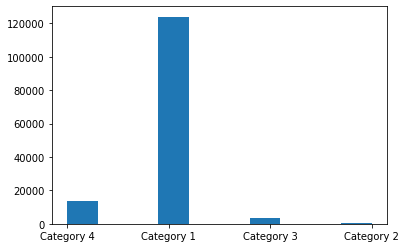

In [288]:
plt.hist(data_retailer2.Category); 

In [245]:
#Replace NAs with 0
data_retailer2= data_retailer1.fillna(0)

In [246]:
#Create categorical variables
data_all_F = pd.concat([data_retailer2,pd.get_dummies(data_retailer2['Category'], prefix='Category',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F = pd.concat([data_all_F,pd.get_dummies(data_all_F['Buckets_Of_Size_2'], prefix='Buckets_Of_Size_2',drop_first=True)],axis=1);data_all_F.head(5)

,Category,Product,Buckets_Of_Size_2,Week,Time,AveragePrice,Volume,Value,APRV,APRU,BasePrice,TPR,ACV_Weighted,Distribution_Weighted,ACV Cumulated Weighted Distribution (SKU) VOL,TPR_PromoCalendar,TPR_PromoCalendar Dummy,PM_multibuy 2+1,PM_60% for second,PM_TPR,PM_multibuy 1+1,leaflets_seasonal,leaflets_standard,cashier,Tailor made name,Tailor made name Dummy,Tailor made name Football,Tailor made name Power of One,Tailor made name Power of One 2,Tailor made amount,Secondary display counts,Secondary display counts Dummy,WeeklyCategoryVolume,IsHoliday,IsChristmas/NewYear,IsEaster,IsSummer,Category_Category 2,Category_Category 3,Category_Category 4,Buckets_Of_Size_2_0 - 100 GR,Buckets_Of_Size_2_0 - 25 GR,Buckets_Of_Size_2_0 - 50 GR,Buckets_Of_Size_2_100 - 250 GR,Buckets_Of_Size_2_201 - 300 GR,Buckets_Of_Size_2_25 - 55 GR,Buckets_Of_Size_2_50-200GR,Buckets_Of_Size_2_>= 250 GR,Buckets_Of_Size_2_>=300 GR,Buckets_Of_Size_2_>=55 GR
0,Category 4,7,0 - 100 GR,1,1,383.789761,158.4097,72158.9027,455.520733,40.996861,601.258208,24.238750,0.92,0.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.7185,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,Category 4,8,0 - 100 GR,1,1,383.789761,24.8724,12531.3173,503.824211,42.824980,753.184106,33.107429,0.87,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.7185,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,Category 4,9,0 - 100 GR,1,1,383.789761,6.4136,4877.3394,760.468286,121.674926,781.697292,2.715758,0.45,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.7185,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,Category 4,10,0 - 100 GR,1,1,383.789761,63.2364,27573.2860,436.035037,41.423286,682.672951,36.128268,0.94,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.7185,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,Category 4,24,0,1,1,383.789761,0.0000,0.0000,0.000000,0.000000,17.158643,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.7185,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Select which product to model

In [247]:
data_all_F_custom = data_all_F_custom[data_all_F_custom['Product'] == 1];

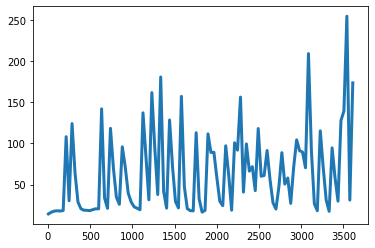

In [248]:
data_all_F_custom['Volume'].plot(linewidth=3)

### Select the features to be included in the train set

In [249]:
X_all = data_all_F_custom[['Product','Week','AveragePrice','APRV','BasePrice','TPR','ACV_Weighted','Distribution_Weighted','TPR_PromoCalendar Dummy','PM_multibuy 2+1','PM_60% for second','PM_TPR','PM_multibuy 1+1','leaflets_seasonal','leaflets_standard','cashier','Tailor made name Dummy','Tailor made name Football','Tailor made amount','Secondary display counts','Secondary display counts Dummy','WeeklyCategoryVolume','IsHoliday','IsChristmas/NewYear','IsEaster','IsSummer','Category_Category 2','Category_Category 3','Category_Category 4','Buckets_Of_Size_2_0 - 100 GR','Buckets_Of_Size_2_0 - 25 GR','Buckets_Of_Size_2_0 - 50 GR','Buckets_Of_Size_2_100 - 250 GR','Buckets_Of_Size_2_201 - 300 GR','Buckets_Of_Size_2_25 - 55 GR','Buckets_Of_Size_2_50-200GR','Buckets_Of_Size_2_>= 250 GR','Buckets_Of_Size_2_>=300 GR','Buckets_Of_Size_2_>=55 GR',]];
Y_all = data_all_F_custom[['Volume']];

### Prepare the data for training

In [250]:
X_all.shape;
X_all_DF = pd.DataFrame(X_all);
X=X_all_DF.values;
X.shape

(104, 39)

In [251]:
Y_all = data_all_F_custom[['Volume']].values;
Y_all.shape


(104, 1)

In [252]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y_all = scaler.fit_transform(Y_all)

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y_all, test_size =0.1)

In [254]:
X_train.shape;
X_test.shape

(11, 39)

In [269]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=120, activation='sigmoid', input_shape = (39,)))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 120)               4800      
_________________________________________________________________
dense_79 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_80 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 101       
Total params: 27,101
Trainable params: 27,101
Non-trainable params: 0
_________________________________________________________________


In [270]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [271]:
epochs_hist=model.fit(X_train,Y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 0.0534 - val_loss: 0.0512
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0536 - val_loss: 0.0229
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0351 - val_loss: 0.0212
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.0191
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.0173
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.0371
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0160
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.0397
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0351 - val_loss: 0.0253
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.0198
Epoch 11/100
9/9 [==========

### Model Validation

In [272]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Loss')

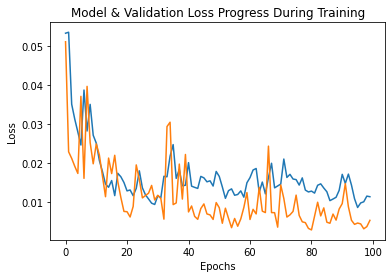

In [273]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model & Validation Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [274]:
y_predict=model.predict(X)

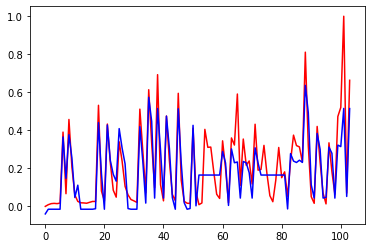

In [275]:
plt.plot(Y_all,color='r')
plt.plot(y_predict,color='b')

In [276]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from math import sqrt

RMSE=float(format(np.sqrt(mean_squared_error(Y_all,y_predict)),'0.3f'));
RMSE

0.103

In [277]:
n=len(X_test)
k=X_test.shape[1]

In [278]:
MSE = mean_squared_error(Y_all,y_predict)
MAE = mean_absolute_error(Y_all,y_predict)
r2 = r2_score(Y_all,y_predict)
adj_r2 =1- (1-r2)*(n-1)/(n-k-1)

In [279]:
print('RMSE=', RMSE)
print('MSE=', MSE)
print('MAE=', MAE)
print('r2=', r2)
print('adj_r2=', adj_r2)


RMSE= 0.103
MSE= 0.01070787658930237
MAE= 0.07521564845766078
r2= 0.7417191796271135
adj_r2= 1.0890623518527194
